# Data quality and consistency checks 

*Updated version, new missing values strategy*

## Contents

### 1. First checks
### 2. Data Prep:
#### 2.1. Data quality checks
#### 2.2 Consistency checks
#### 2.3 New strategy for each row entailing missing Values !
### 3. Outlier check
### 4. Duplicates check
### 5. Timeliness
### 6. Data Profile
### 7. Further inconsistency check:
#### Check unique values in string variables 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import random

In [2]:
# Importing new data set
path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

## 1. First checks

In [3]:
mm_ds_original = pd.read_excel(os.path.join(path, 'Data', 'original data', 'from Website', 'Missing_Migrants_Global_Figures_allData_1.xlsx'))
pd.options.display.max_columns = None
mm_ds_original.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [4]:
mm_ds_original.tail()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
13488,2023.MMP1046,2023.MMP1046,Incident,North America,2023-10-11,2023,October,1.0,NaN,1,2.0,1.0,NaN,NaN,Western Africa,Sickness / lack of access to adequate healthcare,Guinea,US-Mexico border crossing,Open air detention site near San Ysidro border...,"NBCS San Diego, San Diego Union Tribune","32.54156785, -117.061009",Northern America,CBP confirms death of migrant camping between...,3.0,https://web.archive.org/web/*/https://www.nbcs...
13489,2023.MMP1047,2023.MMP1047,Incident,Europe,2023-10-13,2023,October,7.0,NaN,7,16.0,NaN,NaN,1.0,Western Asia,Vehicle accident / death linked to hazardous t...,Mixed,NaN,A94 motorway exit between Ampfing and Waldkrai...,"The Telegraph, The Street Journal","48.24627651, 12.410189",Western Europe,Seven dead as minibus believed to be smugglin...,3.0,https://web.archive.org/web/20231014184810/htt...
13490,2023.MMP1048,2023.MMP1048,Incident,Europe,2023-10-12,2023,October,2.0,NaN,2,5.0,NaN,2.0,NaN,Southern Asia,Vehicle accident / death linked to hazardous t...,Afghanistan,Western Balkans,"Ditch in Kiskunmajsa, Hungary near motorway in...","Roviden, Magyar Nemzet","46.49042299, 19.736968",Eastern Europe,20 éves embercsempész balesetezett Kiskunmajsá...,3.0,https://web.archive.org/web20231014065213/http...
13491,2023.MMP1049,2023.MMP1049,Incident,Mediterranean,2023-10-01,2023,October,NaN,1.0,1,7.0,NaN,NaN,NaN,Western Asia (P),Mixed or unknown,Unknown,Eastern Mediterranean,Unspecified location off the coast of Samandag...,Turkish Coast Guard,"36.07633665, 35.80700626",Uncategorized,Samandağ Sahilinde Başlatılan Arama Kurtarma F...,5.0,https://web.archive.org/web/20231019082127/htt...
13492,2023.MMP1050,2023.MMP1050,Incident,Mediterranean,2023-10-17,2023,October,1.0,NaN,1,37.0,NaN,1.0,NaN,Eastern Africa,Mixed or unknown,Somalia,Eastern Mediterranean,"Unspecified location off the coast of Lesvos, ...","AFP, Enikos","39.30415035, 26.4722731",Uncategorized,Second Deadly Greece Migrant Boat Incident In ...,3.0,https://web.archive.org/web/20231019080934/htt...


### First incident from 01/06/2014; most recent incident from 17/10/2023

In [5]:
mm_ds_original.shape

(13493, 25)

In [6]:
mm_ds_original.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Website Date', 'Incident year', 'Reported Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Region of Origin', 'Cause of Death', 'Country of Origin',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'Article title',
       'Source Quality', 'URL'],
      dtype='object')

In [7]:
# Rename Columns Name for Easy Understandig
renamed_df = mm_ds_original.rename(columns = {'Main ID' : 'main_ID', 'Incident ID' : 'incident_ID', 'Incident Type': 'inc_type', 
                           'Region of Incident' : 'region_inc', 'Website Date': 'website_date',
                           'Incident year' : 'year', 'Reported Month' : 'month', 
                           'Number of Dead' : 'num_dead', 'Minimum Estimated Number of Missing' : 'num_missing',
                           'Total Number of Dead and Missing' : 'total_dead_missing', 'Number of Survivors' : 'num_survivors', 
                           'Number of Females' : 'num_female', 'Number of Males' : 'num_male', 'Number of Children' : 'num_children',
                           'Region of Origin': 'reg_origin', 'Cause of Death' : 'cause_death', 'Country of Origin': 'country_origin',
                           'Migration route':'migration_route', 'Location of death' : 'loc_death', 
                           'Information Source' : 'info_source', 'Coordinates' : 'coordinates', 'UNSD Geographical Grouping' : 'UNSD_geo_group',
                           'Article title': 'article_title', 'Source Quality' : 'source_quality', 'URL': 'url'} 
)
renamed_df.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date',
       'year', 'month', 'num_dead', 'num_missing', 'total_dead_missing',
       'num_survivors', 'num_female', 'num_male', 'num_children', 'reg_origin',
       'cause_death', 'country_origin', 'migration_route', 'loc_death',
       'info_source', 'coordinates', 'UNSD_geo_group', 'article_title',
       'source_quality', 'url'],
      dtype='object')

# 2. Data Prep: 
## 2.1. Data quality checks

In [8]:
# Count unique values
unique_value_counts = renamed_df.nunique()
print(unique_value_counts)

main_ID               13493
incident_ID           13493
inc_type                  4
region_inc               16
website_date           3186
year                     10
month                    12
num_dead                 85
num_missing             120
total_dead_missing      137
num_survivors           229
num_female               48
num_male                 60
num_children             20
reg_origin               34
cause_death              15
country_origin          345
migration_route          25
loc_death              7768
info_source            3957
coordinates           10004
UNSD_geo_group           19
article_title          4416
source_quality            5
url                    5231
dtype: int64


In [9]:
# Count missing values
na_counts = renamed_df.isna().sum()
print(na_counts)

main_ID                   0
incident_ID               0
inc_type                  0
region_inc                0
website_date             15
year                      0
month                     0
num_dead                599
num_missing           12130
total_dead_missing        0
num_survivors         11308
num_female            11051
num_male               5190
num_children          11871
reg_origin                1
cause_death               0
country_origin           10
migration_route        3126
loc_death                 0
info_source               8
coordinates              36
UNSD_geo_group            1
article_title          8477
source_quality            1
url                    3961
dtype: int64


## 2.2 Consistency checks

In [10]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   main_ID             13493 non-null  object 
 1   incident_ID         13493 non-null  object 
 2   inc_type            13493 non-null  object 
 3   region_inc          13493 non-null  object 
 4   website_date        13478 non-null  object 
 5   year                13493 non-null  int64  
 6   month               13493 non-null  object 
 7   num_dead            12894 non-null  float64
 8   num_missing         1363 non-null   float64
 9   total_dead_missing  13493 non-null  int64  
 10  num_survivors       2185 non-null   float64
 11  num_female          2442 non-null   float64
 12  num_male            8303 non-null   float64
 13  num_children        1622 non-null   float64
 14  reg_origin          13492 non-null  object 
 15  cause_death         13493 non-null  object 
 16  coun

In [11]:
renamed_df.dtypes

main_ID                object
incident_ID            object
inc_type               object
region_inc             object
website_date           object
year                    int64
month                  object
num_dead              float64
num_missing           float64
total_dead_missing      int64
num_survivors         float64
num_female            float64
num_male              float64
num_children          float64
reg_origin             object
cause_death            object
country_origin         object
migration_route        object
loc_death              object
info_source            object
coordinates            object
UNSD_geo_group         object
article_title          object
source_quality        float64
url                    object
dtype: object

In [12]:
# Checking whether data frame contains any mixed-type columns
for col in renamed_df.columns.tolist():
  weird = (renamed_df[[col]].applymap(type) != renamed_df[[col]].iloc[0].apply(type)).any(axis = 1) # Test that checks whether the data types within the column are consistent. 
  if len (renamed_df[weird]) > 0: 
    print (col)

website_date
reg_origin
country_origin
migration_route
info_source
coordinates
UNSD_geo_group
article_title
url


### Check these inconsistencies in Excel

In [13]:
# Sample the data in each column to get a sense of mixed data types
sampled_data = renamed_df.sample(20)

# Iterate through the columns and display the sampled data
for column in renamed_df.columns:
    print(f"Column: {column}")
    print(sampled_data[column])
    print("\n")

# Check the distribution of unique values in each column
for column in renamed_df.columns:
    print(f"Column: {column}")
    unique_values = renamed_df[column].unique()
    value_counts = renamed_df[column].value_counts()
    print(f"Unique Values: {unique_values}")
    print(f"Value Counts:\n{value_counts}\n")


Column: main_ID
3275      2017.MMP00880
7419      2020.MMP00263
5754      2019.MMP00405
4418      2018.MMP00688
3188      2017.MMP00791
4728      2018.MMP00999
6252      2019.MMP00932
10445     2022.MMP00180
2193     2016.MMP007648
2948      2017.MMP00549
5117      2018.MMP01389
11712      2022.MMP1508
6954      2019.MMP01664
11336      2022.MMP1119
9139      2021.MMP00729
8077      2020.MMP01000
10765      2022.MMP0515
11755      2022.MMP1551
6838      2019.MMP01546
1287      2016.MMP00174
Name: main_ID, dtype: object


Column: incident_ID
3275                      2017.MMP00880
7419                      2020.MMP00263
5754                      2019.MMP00405
4418                      2018.MMP00688
3188                      2017.MMP00791
4728                      2018.MMP00999
6252                      2019.MMP00932
10445                     2022.MMP00180
2193                     2016.MMP007648
2948                      2017.MMP00549
5117                      2018.MMP01389
11712        

In [14]:
# Transform column "Website date" 

expected_format = r"\d{4}-\d{2}-\d{2}"
renamed_df['website_date'] = renamed_df['website_date'].apply(lambda x: re.search(expected_format, str(x)).group(0) if re.search(expected_format, str(x)) else None)
renamed_df['website_date'] = pd.to_datetime(renamed_df['website_date'], format='%Y-%m-%d', errors='coerce')
date_counts = renamed_df['website_date'].value_counts()
print(date_counts)

website_date
2016-03-20    27
2016-02-21    20
2016-07-31    19
2022-05-17    19
2016-12-19    19
              ..
2017-08-04     1
2017-08-05     1
2017-08-14     1
2017-08-15     1
2023-10-17     1
Name: count, Length: 3186, dtype: int64


In [15]:
unique_dates_count = renamed_df['website_date'].nunique()
print(f"Number of unique dates: {unique_dates_count}")

Number of unique dates: 3186


In [16]:
# Checking whether data frame contains any mixed-type columns
for col in renamed_df.columns.tolist():
  weird = (renamed_df[[col]].applymap(type) != renamed_df[[col]].iloc[0].apply(type)).any(axis = 1) # Test that checks whether the data types within the column are consistent. 
  if len (renamed_df[weird]) > 0: 
    print (col)

website_date
reg_origin
country_origin
migration_route
info_source
coordinates
UNSD_geo_group
article_title
url


In [17]:
# Verify the unique name of the months
# any duplication --> spellings
renamed_df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [18]:
# Get a first impression of inconsistencies 

renamed_df.describe()

,website_date,year,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,source_quality
count,13478,13493.000000,12894.000000,1363.000000,13493.00000,2185.000000,2442.000000,8303.000000,1622.000000,13492.000000
mean,2019-09-17 07:35:40.554978304,2019.197510,2.619280,18.667645,4.38872,40.068192,2.515971,1.825485,1.956227,3.264231
min,2014-01-02 00:00:00,2014.000000,0.000000,-2.000000,1.00000,-2.000000,0.000000,0.000000,0.000000,1.000000
25%,2017-10-08 00:00:00,2017.000000,1.000000,2.000000,1.00000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,2019-10-05 00:00:00,2019.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,1.000000,4.000000
75%,2021-12-01 00:00:00,2021.000000,2.000000,17.000000,2.00000,38.000000,2.000000,1.000000,2.000000,4.000000
max,2023-10-17 00:00:00,2023.000000,750.000000,750.000000,1022.00000,1950.000000,94.000000,135.000000,250.000000,5.000000
std,NaN,2.482202,9.612398,45.131106,19.66173,97.035667,6.212009,4.729596,6.606593,1.371832


### Inconsistency: Min = -2 for num_missing, num_survivors --> solve later

In [19]:
renamed_df.describe(include= object)

,main_ID,incident_ID,inc_type,region_inc,month,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,url
count,13493,13493,13493,13493,13493,13492,13493,13483,10367,13493,13485,13457,13492,5016,9532
unique,13493,13493,4,16,12,34,15,345,25,7768,3957,10004,19,4416,5231
top,2014.MMP00001,2014.MMP00001,Incident,North America,September,Latin America / Caribbean (P),Drowning,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"30.96704016, 61.82069052",Northern America,MHub Survey Data Italy 1.17,http://www.mixedmigration.org/4mi/
freq,1,1,13126,2849,1315,2259,3409,7405,3581,1061,1574,200,2851,103,2730


# 2.3 New strategy for each row entailing missing Values !
### I checked all missing values in Excel, because it was more convenient for a cross-column check via filtering for blanks. It also allowed me to find further indications of missings, for example "Uncategorized" in 'UNSD Geographical Grouping' (UNSD_geo_group). 

## 1. Website date:

In the Missing Migrants dataset from the IOM, I have a colum "website date" in the format yyyy-mm-dd. 15 entries are missing, but I have the months from the "reported month" column and the year from the "Incident year" column. I fill the missings in website date with the values from "Incident year" column, "reported month" column, and a random date.

In [20]:
# Identify the rows with missing "website date" values:

missing_website_date = renamed_df['website_date'].isnull()
missing_rows = renamed_df[missing_website_date]
print(missing_rows)

            main_ID    incident_ID  inc_type       region_inc website_date  \
7134  2019.MMP01859  2019.MMP01859  Incident    Southern Asia          NaT   
8148  2020.MMP01074  2020.MMP01074  Incident  Central America          NaT   
8149  2020.MMP01075  2020.MMP01075  Incident  Central America          NaT   
8154  2020.MMP01080  2020.MMP01080  Incident  Central America          NaT   
8158  2020.MMP01084  2020.MMP01084  Incident  Central America          NaT   
8161  2020.MMP01088  2020.MMP01088  Incident  Central America          NaT   
8162  2020.MMP01089  2020.MMP01089  Incident  Central America          NaT   
8163  2020.MMP01090  2020.MMP01090  Incident  Central America          NaT   
8166  2020.MMP01093  2020.MMP01093  Incident  Central America          NaT   
8167  2020.MMP01094  2020.MMP01094  Incident  Central America          NaT   
8169  2020.MMP01096  2020.MMP01096  Incident  Central America          NaT   
8170  2020.MMP01097  2020.MMP01097  Incident    North America   

#### Entails February: random dates between 1-28.

In [21]:
# Converting Months to numbers
# Define a dictionary that maps month names to numbers
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace month names with numbers
renamed_df['month_num'] = renamed_df['month'].map(month_to_number)

In [22]:
renamed_df.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/,1
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1


In [23]:
# Create a function to generate a random date within a given year and month:

def random_date(year, month_num):
    year = int(year)
    month = int(month_num)
    day = random.randint(1, 28)
    return f"{year:04d}-{month:02d}-{day:02d}"

In [24]:
# Create a new column "website_date_new" with the original values to check later, if values are filled correctly

renamed_df['website_date_new'] = renamed_df['website_date']

In [25]:
# Loop through the rows with missing "website date" and fill them with a random date generated using the "Incident year" and "reported month" columns:

for index, row in renamed_df[missing_website_date].iterrows():
    incident_year = row['year']
    reported_month = row['month_num']
    
    random_date_value = random_date(incident_year, reported_month)
    
    renamed_df.at[index, 'website_date_new'] = random_date_value

In [26]:
# Show only the rows where the "website date" column has missing values and the specific columns to check

selected_columns = renamed_df.loc[missing_website_date, ['website_date', 'website_date_new', 'month', 'month_num','year']]
print(selected_columns)

     website_date website_date_new      month  month_num  year
7134          NaT       2019-01-14    January          1  2019
8148          NaT       2020-02-10   February          2  2020
8149          NaT       2020-03-05      March          3  2020
8154          NaT       2020-05-23        May          5  2020
8158          NaT       2020-07-07       July          7  2020
8161          NaT       2020-08-25     August          8  2020
8162          NaT       2020-08-16     August          8  2020
8163          NaT       2020-08-19     August          8  2020
8166          NaT       2020-09-26  September          9  2020
8167          NaT       2020-09-26  September          9  2020
8169          NaT       2020-10-19    October         10  2020
8170          NaT       2020-01-18    January          1  2020
8172          NaT       2020-06-23       June          6  2020
8173          NaT       2020-08-12     August          8  2020
8174          NaT       2020-11-12   November         1

In [27]:
# Check random entries for 
selected_columns = renamed_df.loc[0:9, ['website_date', 'website_date_new']]
print(selected_columns)

  website_date website_date_new
0   2014-01-06       2014-01-06
1   2014-01-12       2014-01-12
2   2014-01-14       2014-01-14
3   2014-01-16       2014-01-16
4   2014-01-16       2014-01-16
5   2014-01-17       2014-01-17
6   2014-01-19       2014-01-19
7   2014-01-22       2014-01-22
8   2014-01-24       2014-01-24
9   2014-01-24       2014-01-24


In [28]:
different_dates = renamed_df[renamed_df['website_date'] != renamed_df['website_date_new']]
print(different_dates)

            main_ID    incident_ID  inc_type       region_inc website_date  \
7134  2019.MMP01859  2019.MMP01859  Incident    Southern Asia          NaT   
8148  2020.MMP01074  2020.MMP01074  Incident  Central America          NaT   
8149  2020.MMP01075  2020.MMP01075  Incident  Central America          NaT   
8154  2020.MMP01080  2020.MMP01080  Incident  Central America          NaT   
8158  2020.MMP01084  2020.MMP01084  Incident  Central America          NaT   
8161  2020.MMP01088  2020.MMP01088  Incident  Central America          NaT   
8162  2020.MMP01089  2020.MMP01089  Incident  Central America          NaT   
8163  2020.MMP01090  2020.MMP01090  Incident  Central America          NaT   
8166  2020.MMP01093  2020.MMP01093  Incident  Central America          NaT   
8167  2020.MMP01094  2020.MMP01094  Incident  Central America          NaT   
8169  2020.MMP01096  2020.MMP01096  Incident  Central America          NaT   
8170  2020.MMP01097  2020.MMP01097  Incident    North America   

## Checks completed. Missing values for "website_date" successfully filled in new variable "website_date_new". Delete old variable later!

## 2. num_dead

Check skrew, decide for median or mean imputation.

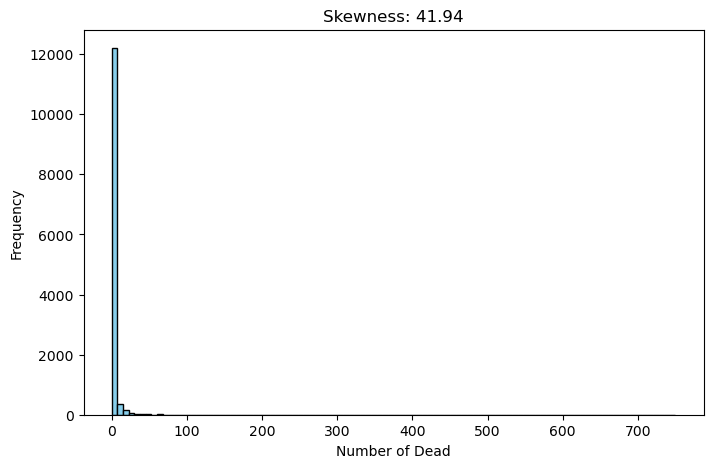

In [29]:
# Check skewness
skewness = renamed_df['num_dead'].skew()

# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(renamed_df['num_dead'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title(f'Skewness: {skewness:.2f}')
plt.xlabel('Number of Dead')
plt.ylabel('Frequency')
plt.show()

### Variable "num_dead" is highly left-skewed, so I decide for median imputation.

In [30]:
# Calculate median

median = renamed_df['num_dead'].median()
median

1.0

In [31]:
# Create the 'num_dead_imp' column and fill missing values with the median

renamed_df['num_dead_imp'] = renamed_df['num_dead'].fillna(median)

In [32]:
renamed_df.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/,1,2014-01-06,1.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1,2014-01-12,1.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1,2014-01-14,1.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1,2014-01-16,1.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1,2014-01-16,1.0


In [33]:
# Copy non-missing values from 'num_dead' to 'num_dead_imp'

renamed_df['num_dead_imp'].fillna(renamed_df['num_dead'], inplace=True)

In [34]:
# Check 

selected_columns_dead = renamed_df.loc[0:20, ['num_dead', 'num_dead_imp']]
print(selected_columns_dead)

    num_dead  num_dead_imp
0        1.0           1.0
1        1.0           1.0
2        1.0           1.0
3        1.0           1.0
4        1.0           1.0
5        1.0           1.0
6       12.0          12.0
7        1.0           1.0
8        1.0           1.0
9        1.0           1.0
10       1.0           1.0
11       1.0           1.0
12       1.0           1.0
13       1.0           1.0
14       1.0           1.0
15       1.0           1.0
16       5.0           5.0
17      15.0          15.0
18       1.0           1.0
19       1.0           1.0
20       1.0           1.0


In [35]:
# Check

different_num_dead = renamed_df[renamed_df['num_dead'] != renamed_df['num_dead_imp']]
print(different_num_dead)

             main_ID                                        incident_ID  \
70     2014.MMP00072                                      2014.MMP00072   
181    2014.MMP00186                                      2014.MMP00186   
185    2014.MMP00190                                      2014.MMP00190   
195    2014.MMP00200                                      2014.MMP00200   
214    2014.MMP00220                                      2014.MMP00220   
...              ...                                                ...   
13361   2023.MMP0919                                       2023.MMP0919   
13363   2023.MMP0921                                       2023.MMP0921   
13364   2023.MMP0922  2023.MMP09221104,2023.MMP09221105,2023.MMP0922...   
13365   2023.MMP0923                  2023.MMP09231112,2023.MMP09231113   
13491   2023.MMP1049                                       2023.MMP1049   

             inc_type       region_inc website_date  year      month  \
70           Incident    Me

## However, the total_dead_missing column combines the cases were the number of deads is unknown but we have the number of missings. Data integrity is most reliable when calculating with the total_dead_missing column. Num_dead and num_missing can later be deleted.

### check sums to be sure

In [36]:
sum_num_dead = renamed_df['total_dead_missing'].sum()

print(f"Sum of 'total_dead_missing' column: {sum_num_dead}")

Sum of 'total_dead_missing' column: 59217


In [37]:
# Calculate the sum of 'num_dead' column
sum_num_dead = renamed_df['num_dead'].sum()

# Calculate the sum of 'num_missing' column
sum_num_missing = renamed_df['num_missing'].sum()

# Calculate the total sum of the two sums
total_sum = sum_num_dead + sum_num_missing

print(f"Sum of 'num_dead' column: {sum_num_dead}")
print(f"Sum of 'num_missing' column: {sum_num_missing}")
print(f"Total sum of 'num_dead' and 'num_missing': {total_sum}")

Sum of 'num_dead' column: 33773.0
Sum of 'num_missing' column: 25444.0
Total sum of 'num_dead' and 'num_missing': 59217.0


In [38]:
# Create a new DataFrame with missing values replaced by NAs, in case those are needed later

missings_df = renamed_df.copy()  # Create a copy of the original DataFrame

# Replace missing values in 'num_dead' and 'num_missing' columns with NaN
missings_df['num_dead'].fillna(pd.NA, inplace=True)
missings_df['num_missing'].fillna(pd.NA, inplace=True)

In [39]:
summary_stats = renamed_df.describe()
summary_stats

,website_date,year,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,source_quality,month_num,website_date_new,num_dead_imp
count,13478,13493.000000,12894.000000,1363.000000,13493.00000,2185.000000,2442.000000,8303.000000,1622.000000,13492.000000,13493.000000,13493,13493.000000
mean,2019-09-17 07:35:40.554978304,2019.197510,2.619280,18.667645,4.38872,40.068192,2.515971,1.825485,1.956227,3.264231,6.684355,2019-09-17 14:34:35.209368064,2.547395
min,2014-01-02 00:00:00,2014.000000,0.000000,-2.000000,1.00000,-2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2014-01-02 00:00:00,0.000000
25%,2017-10-08 00:00:00,2017.000000,1.000000,2.000000,1.00000,4.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2017-10-08 00:00:00,1.000000
50%,2019-10-05 00:00:00,2019.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,1.000000,4.000000,7.000000,2019-10-05 00:00:00,1.000000
75%,2021-12-01 00:00:00,2021.000000,2.000000,17.000000,2.00000,38.000000,2.000000,1.000000,2.000000,4.000000,9.000000,2021-11-30 00:00:00,2.000000
max,2023-10-17 00:00:00,2023.000000,750.000000,750.000000,1022.00000,1950.000000,94.000000,135.000000,250.000000,5.000000,12.000000,2023-10-17 00:00:00,750.000000
std,NaN,2.482202,9.612398,45.131106,19.66173,97.035667,6.212009,4.729596,6.606593,1.371832,3.340813,NaN,9.402514


## Change inconsistencies in num_missing and num_survivors

In [40]:
# Filter rows with a minus sign in the 'num_missing' column
negative_values = renamed_df[renamed_df['num_missing'] < 0]

# Display the filtered rows
print(negative_values)

             main_ID                                        incident_ID  \
601    2015.MMP00308                                      2015.MMP00308   
806    2015.MMP00513  2015.MMP00513541,2015.MMP00513542,2015.MMP0051...   
858    2015.MMP00565                  2015.MMP00565596,2015.MMP00565597   
10422  2022.MMP00157                                      2022.MMP00157   

                  inc_type       region_inc website_date  year    month  \
601    Cumulative Incident  Central America   2015-08-18  2015   August   
806         Split Incident    Mediterranean   2015-10-16  2015  October   
858         Split Incident    Mediterranean   2015-10-28  2015  October   
10422             Incident    Mediterranean   2022-03-12  2022    March   

       num_dead  num_missing  total_dead_missing  num_survivors  num_female  \
601        20.0         -1.0                  19            1.0         NaN   
806        15.0         -2.0                  13            NaN         6.0   
858        

### Absolute count of 4 negative values in num_missing: 5. Hence, sum of the column and the total of num_dead and num_missing must be + 10 after transformation.

In [41]:
# Filter rows with a minus sign in the 'num_survivors' column
negative_values = renamed_df[renamed_df['num_survivors'] < 0]

# Display the filtered rows
print(negative_values)

            main_ID                        incident_ID        inc_type  \
1247  2016.MMP00134  2016.MMP00134134,2016.MMP00134135  Split Incident   
7794  2020.MMP00661                      2020.MMP00661        Incident   
7796  2020.MMP00663                      2020.MMP00663        Incident   
7800  2020.MMP00667                      2020.MMP00667        Incident   
7889  2020.MMP00773                      2020.MMP00773        Incident   

              region_inc website_date  year      month  num_dead  num_missing  \
1247     Northern Africa   2016-02-07  2016   February       1.0         56.0   
7794  South-eastern Asia   2020-09-09  2020  September       1.0          NaN   
7796  South-eastern Asia   2020-09-10  2020  September       1.0          NaN   
7800  South-eastern Asia   2020-09-11  2020  September       1.0          NaN   
7889     Northern Africa   2020-10-03  2020    October       2.0          NaN   

      total_dead_missing  num_survivors  num_female  num_male  num_c

### Absolute count of 5 negative values: 6. Hence, sum must be + 12 after transformation.

In [42]:
# Create a copy of the original DataFrame

incon_check_df = renamed_df.copy()

# Change negative values to positive in "num_missing" and "num_survivors" columns

incon_check_df['num_missing'] = incon_check_df['num_missing'].abs()
incon_check_df['num_survivors'] = incon_check_df['num_survivors'].abs()

In [43]:
summary_stats.to_excel("summary__newvar_output.xlsx")
incon_check_df.describe()

,website_date,year,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,source_quality,month_num,website_date_new,num_dead_imp
count,13478,13493.000000,12894.000000,1363.000000,13493.00000,2185.000000,2442.000000,8303.000000,1622.000000,13492.000000,13493.000000,13493,13493.000000
mean,2019-09-17 07:35:40.554978304,2019.197510,2.619280,18.674982,4.38872,40.073684,2.515971,1.825485,1.956227,3.264231,6.684355,2019-09-17 14:34:35.209368064,2.547395
min,2014-01-02 00:00:00,2014.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2014-01-02 00:00:00,0.000000
25%,2017-10-08 00:00:00,2017.000000,1.000000,2.000000,1.00000,4.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2017-10-08 00:00:00,1.000000
50%,2019-10-05 00:00:00,2019.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,1.000000,4.000000,7.000000,2019-10-05 00:00:00,1.000000
75%,2021-12-01 00:00:00,2021.000000,2.000000,17.000000,2.00000,38.000000,2.000000,1.000000,2.000000,4.000000,9.000000,2021-11-30 00:00:00,2.000000
max,2023-10-17 00:00:00,2023.000000,750.000000,750.000000,1022.00000,1950.000000,94.000000,135.000000,250.000000,5.000000,12.000000,2023-10-17 00:00:00,750.000000
std,NaN,2.482202,9.612398,45.128069,19.66173,97.033398,6.212009,4.729596,6.606593,1.371832,3.340813,NaN,9.402514


In [44]:
# Check tranformation of negative values via sums

# Calculate the sum of values in the "old_num_missing" column
column_sum = renamed_df['num_missing'].sum()

print(f"Sum of values in 'old_num_missing': {column_sum}")

# Calculate the sum of values in the "new_num_missing" column
column_sum = incon_check_df['num_missing'].sum()

print(f"Sum of values in 'new_num_missing': {column_sum}")


# Calculate the sum of values in the "old_num_survivors" column
column_sum = renamed_df['num_survivors'].sum()

print(f"Sum of values in 'old_num_survivors': {column_sum}")

# Calculate the sum of values in the "num_survivors" column
column_sum = incon_check_df['num_survivors'].sum()

print(f"Sum of values in 'new_num_survivors': {column_sum}")

Sum of values in 'old_num_missing': 25444.0
Sum of values in 'new_num_missing': 25454.0
Sum of values in 'old_num_survivors': 87549.0
Sum of values in 'new_num_survivors': 87561.0


In [45]:
# Check num_missing old df

row_indices = [601, 806, 858, 10422]
selected_rows = renamed_df.iloc[row_indices]
selected_rows

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp
601,2015.MMP00308,2015.MMP00308,Cumulative Incident,Central America,2015-08-18,2015,August,20.0,-1.0,19,1.0,NaN,1.0,1.0,Central America,Mixed or unknown,Unknown,NaN,"State of Puebla, Mexico",El Popular,"18.082037, -97.920056",Central America,Acusan a policías de Edomex por violación de m...,3.0,https://archive.vn/wip/wDvO3,8,2015-08-18,20.0
806,2015.MMP00513,"2015.MMP00513541,2015.MMP00513542,2015.MMP0051...",Split Incident,Mediterranean,2015-10-16,2015,October,15.0,-2.0,13,NaN,6.0,3.0,6.0,Western Asia,"Drowning,Mixed or unknown","Afghanistan,Syrian Arab Republic,Unknown",Eastern Mediterranean,"Found on the coast of Lesvos,Off the coast of ...",Hurriyet Daily News,"39.4162, 26.4074",Uncategorized,Twelve migrants drown after boat sinks off of ...,1.0,"http://bit.ly/1RnKlDw,http://www.hcg.gr/node/1...",10,2015-10-16,15.0
858,2015.MMP00565,"2015.MMP00565596,2015.MMP00565597",Split Incident,Mediterranean,2015-10-28,2015,October,57.0,-1.0,56,274.0,7.0,17.0,20.0,Western / Southern Asia (P),Drowning,Unknown,Eastern Mediterranean,"Found on beaches in Lesvos,north of Lesvos, Gr...",Hellenic Coast Guard,"39.3856462, 26.216722",Uncategorized,NaN,5.0,http://www.hcg.gr/node/11414,10,2015-10-28,57.0
10422,2022.MMP00157,2022.MMP00157,Incident,Mediterranean,2022-03-12,2022,March,2.0,-1.0,1,NaN,NaN,2.0,NaN,Unknown,Drowning,"Egypt,Unknown",Central Mediterranean,"Remains washed ashore at Surman beach, Libya",IOM Libya,"32.79560599, 12.583315",Uncategorized,NaN,4.0,NaN,3,2022-03-12,2.0


In [46]:
# Check num_missing new df

row_indices = [601, 806, 858, 10422]
selected_rows = incon_check_df.iloc[row_indices]
selected_rows

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp
601,2015.MMP00308,2015.MMP00308,Cumulative Incident,Central America,2015-08-18,2015,August,20.0,1.0,19,1.0,NaN,1.0,1.0,Central America,Mixed or unknown,Unknown,NaN,"State of Puebla, Mexico",El Popular,"18.082037, -97.920056",Central America,Acusan a policías de Edomex por violación de m...,3.0,https://archive.vn/wip/wDvO3,8,2015-08-18,20.0
806,2015.MMP00513,"2015.MMP00513541,2015.MMP00513542,2015.MMP0051...",Split Incident,Mediterranean,2015-10-16,2015,October,15.0,2.0,13,NaN,6.0,3.0,6.0,Western Asia,"Drowning,Mixed or unknown","Afghanistan,Syrian Arab Republic,Unknown",Eastern Mediterranean,"Found on the coast of Lesvos,Off the coast of ...",Hurriyet Daily News,"39.4162, 26.4074",Uncategorized,Twelve migrants drown after boat sinks off of ...,1.0,"http://bit.ly/1RnKlDw,http://www.hcg.gr/node/1...",10,2015-10-16,15.0
858,2015.MMP00565,"2015.MMP00565596,2015.MMP00565597",Split Incident,Mediterranean,2015-10-28,2015,October,57.0,1.0,56,274.0,7.0,17.0,20.0,Western / Southern Asia (P),Drowning,Unknown,Eastern Mediterranean,"Found on beaches in Lesvos,north of Lesvos, Gr...",Hellenic Coast Guard,"39.3856462, 26.216722",Uncategorized,NaN,5.0,http://www.hcg.gr/node/11414,10,2015-10-28,57.0
10422,2022.MMP00157,2022.MMP00157,Incident,Mediterranean,2022-03-12,2022,March,2.0,1.0,1,NaN,NaN,2.0,NaN,Unknown,Drowning,"Egypt,Unknown",Central Mediterranean,"Remains washed ashore at Surman beach, Libya",IOM Libya,"32.79560599, 12.583315",Uncategorized,NaN,4.0,NaN,3,2022-03-12,2.0


In [47]:
# Check num_survivors old df
row_indices = [1247, 7794, 7796, 7800, 7889]
selected_rows = renamed_df.iloc[row_indices]
selected_rows

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp
1247,2016.MMP00134,"2016.MMP00134134,2016.MMP00134135",Split Incident,Northern Africa,2016-02-07,2016,February,1.0,56.0,57,-1.0,NaN,1.0,NaN,Sub-Saharan Africa (P),"Drowning,Harsh environmental conditions / lack...",Unknown,Western Africa / Atlantic route to the Canary ...,"Between Dakhla, Western Sahara and Gran Canari...",Asociación Pro Derechos Humanos de Andalucía,"26.9455294, -15.5943805",Uncategorized,Salvamento reanuda la búsqueda de la patera qu...,3.0,"http://bit.ly/1SLpxdH,http://bit.ly/2qSWQ3s",2,2016-02-07,1.0
7794,2020.MMP00661,2020.MMP00661,Incident,South-eastern Asia,2020-09-09,2020,September,1.0,NaN,1,-1.0,1.0,NaN,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-09,1.0
7796,2020.MMP00663,2020.MMP00663,Incident,South-eastern Asia,2020-09-10,2020,September,1.0,NaN,1,-1.0,NaN,1.0,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-10,1.0
7800,2020.MMP00667,2020.MMP00667,Incident,South-eastern Asia,2020-09-11,2020,September,1.0,NaN,1,-1.0,1.0,NaN,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-11,1.0
7889,2020.MMP00773,2020.MMP00773,Incident,Northern Africa,2020-10-03,2020,October,2.0,NaN,2,-2.0,NaN,2.0,NaN,Sub-Saharan Africa (P),Harsh environmental conditions / lack of adequ...,Unknown,Western Africa / Atlantic route to the Canary ...,"In a hospital in Las Palmas, Spain - Rescued t...","El Diario, Txema Santana","28.1008837, -15.4653897",Uncategorized,Mueren este sábado dos migrantes que se encont...,3.0,https://archive.vn/4TntV,10,2020-10-03,2.0


In [48]:
# Check num_survivors new df

row_indices = [1247, 7794, 7796, 7800, 7889]
selected_rows = incon_check_df.iloc[row_indices]
selected_rows

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp
1247,2016.MMP00134,"2016.MMP00134134,2016.MMP00134135",Split Incident,Northern Africa,2016-02-07,2016,February,1.0,56.0,57,1.0,NaN,1.0,NaN,Sub-Saharan Africa (P),"Drowning,Harsh environmental conditions / lack...",Unknown,Western Africa / Atlantic route to the Canary ...,"Between Dakhla, Western Sahara and Gran Canari...",Asociación Pro Derechos Humanos de Andalucía,"26.9455294, -15.5943805",Uncategorized,Salvamento reanuda la búsqueda de la patera qu...,3.0,"http://bit.ly/1SLpxdH,http://bit.ly/2qSWQ3s",2,2016-02-07,1.0
7794,2020.MMP00661,2020.MMP00661,Incident,South-eastern Asia,2020-09-09,2020,September,1.0,NaN,1,1.0,1.0,NaN,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-09,1.0
7796,2020.MMP00663,2020.MMP00663,Incident,South-eastern Asia,2020-09-10,2020,September,1.0,NaN,1,1.0,NaN,1.0,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-10,1.0
7800,2020.MMP00667,2020.MMP00667,Incident,South-eastern Asia,2020-09-11,2020,September,1.0,NaN,1,1.0,1.0,NaN,NaN,Southern Asia,Sickness / lack of access to adequate healthcare,Myanmar,NaN,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia,Tres refugiados rohinyás mueren en Indonesia t...,4.0,https://archive.ph/iglFk,9,2020-09-11,1.0
7889,2020.MMP00773,2020.MMP00773,Incident,Northern Africa,2020-10-03,2020,October,2.0,NaN,2,2.0,NaN,2.0,NaN,Sub-Saharan Africa (P),Harsh environmental conditions / lack of adequ...,Unknown,Western Africa / Atlantic route to the Canary ...,"In a hospital in Las Palmas, Spain - Rescued t...","El Diario, Txema Santana","28.1008837, -15.4653897",Uncategorized,Mueren este sábado dos migrantes que se encont...,3.0,https://archive.vn/4TntV,10,2020-10-03,2.0


In [49]:
sum_num_dead = incon_check_df['total_dead_missing'].sum()

print(f"Sum of 'total_dead_missing' column: {sum_num_dead}")

Sum of 'total_dead_missing' column: 59217


### New total must be +10, see further down

In [50]:
incon_check_df.shape

(13493, 28)

## 3. Instead of imputing (or only deleting), I create new features from the variables:
- num_dead
- num_missing
- num_survivors
- num_female
- num_male
- num_children

## then, the single variables may be deleted from the resulting data frame.

### First, I have to set NA's to zero in order to have valid strings for calculations. 

In [51]:
# Create a copy of the original DataFrame
new_col_df = incon_check_df.copy()

# List of columns to replace missing values with zero
columns_to_replace_zero = ['num_dead', 'num_missing', 'num_survivors', 'num_female', 'num_male', 'num_children']

# Replace missing values with zero in the specified columns
new_col_df[columns_to_replace_zero] = new_col_df[columns_to_replace_zero].fillna(0)

In [52]:
# Calculate the sum of 'num_survivors' column
sum_num_survivors = incon_check_df['num_survivors'].sum()

# Calculate the sum of 'num_survivors' column
sum_num_female = incon_check_df['num_female'].sum()

# Calculate the sum of 'num_male' column
sum_num_male = incon_check_df['num_male'].sum()

# Calculate the sum of 'num_children' column
sum_num_children = incon_check_df['num_children'].sum()

print(f"Sum of 'num_survivors' column: {sum_num_survivors}")
print(f"Sum of 'num_female' column: {sum_num_female}")
print(f"Sum of 'num_male' column: {sum_num_male}")
print(f"Sum of 'num_children' column: {sum_num_children}")

Sum of 'num_survivors' column: 87561.0
Sum of 'num_female' column: 6144.0
Sum of 'num_male' column: 15157.0
Sum of 'num_children' column: 3173.0


In [53]:
# Deriving new columns

# Creating new total from num_dead and num_missing (after tranforming negative values in num_missing), delete total_dead_missing later

new_col_df['tot_dead_miss'] = new_col_df['num_dead'] + new_col_df['num_missing']

# Derive new, meaningful columns from columns with many missing values

# The known total of migrants ending up in life-threatening incidents
new_col_df['tot_migrants'] = new_col_df['tot_dead_miss'] + new_col_df['num_survivors']

# The known total of migrants in life-threatening incidents that survived such an incident
new_col_df['tot_survive'] = new_col_df['tot_migrants'] - new_col_df['tot_dead_miss']

# The total of migrants were demographics could be reconstructed/not. 
new_col_df['identified_demogr'] = new_col_df['num_male'] + new_col_df['num_female'] + new_col_df['num_children']
new_col_df['unidentified_demogr'] = new_col_df['tot_dead_miss'] - new_col_df['identified_demogr']

In [54]:
# Calculate the sum of 'tot_dead_miss' column
sum_tot_dead_miss = new_col_df['tot_dead_miss'].sum()

# Calculate the sum of 'tot_migrants' column
sum_tot_migrants = new_col_df['tot_migrants'].sum()

# Calculate the sum of 'tot_survive' column
sum_tot_survive = new_col_df['tot_survive'].sum()

# Calculate the sum of 'identified' column
sum_identified_demogr = new_col_df['identified_demogr'].sum()

# Calculate the sum of 'not_identified' column
sum_unidentified_demogr = new_col_df['unidentified_demogr'].sum()

print(f"Sum of 'tot_dead_miss' column: {sum_tot_dead_miss}")
print(f"Sum of 'tot_migrants' column: {sum_tot_migrants}")
print(f"Sum of 'tot_survive' column: {sum_tot_survive}")
print(f"Sum of 'identified_demogr' column: {sum_identified_demogr}")
print(f"Sum of 'unidentified_demogr' column: {sum_unidentified_demogr}")

Sum of 'tot_dead_miss' column: 59227.0
Sum of 'tot_migrants' column: 146788.0
Sum of 'tot_survive' column: 87561.0
Sum of 'identified_demogr' column: 24474.0
Sum of 'unidentified_demogr' column: 34753.0


# 4. reg_origin

In [55]:
# Show the row(s) where the column has a missing (blank)

missing_region_of_origin = new_col_df[new_col_df['reg_origin'].isna()]  # or isnull()]
print(missing_region_of_origin)

            main_ID    incident_ID  inc_type     region_inc website_date  \
1217  2016.MMP00103  2016.MMP00103  Incident  Mediterranean   2016-01-30   

      year    month  num_dead  num_missing  total_dead_missing  num_survivors  \
1217  2016  January      39.0          0.0                  39           75.0   

      num_female  num_male  num_children reg_origin cause_death  \
1217         0.0       0.0           5.0        NaN    Drowning   

                             country_origin        migration_route  \
1217  Afghanistan,Iraq,Syrian Arab Republic  Eastern Mediterranean   

                                              loc_death  \
1217  between Ayvacik, Canakkale, Türkiye and Lesvos...   

                                            info_source  \
1217  Turkish Coast Guard via IOM Athens. AFP and th...   

                 coordinates UNSD_geo_group  \
1217  39.2893824, 26.4734281  Uncategorized   

                                          article_title  source_quality  \


In [56]:
# Define the patterns I want to search for
patterns = ['Afghanistan', 'Iraq', 'Syrian Arab Republic', 'Syrian', 'Arab Republic']

# Combine the patterns into a regular expression for matching
pattern = '|'.join(patterns)

# Use str.contains() to filter the rows based on the regular expression
filtered_data = new_col_df[new_col_df['country_origin'].str.contains(pattern, case=False, na=False)]

# Display the resulting DataFrame
filtered_data

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr
6,2014.MMP00007,2014.MMP00007,Incident,Mediterranean,2014-01-19,2014,January,12.0,0.0,12,0.0,9.0,0.0,3.0,Unknown,Drowning,"Afghanistan,Syrian Arab Republic",Eastern Mediterranean,Waters near Greece while being towed back to T...,European Council on Refugees and Exiles,"37.2832, 27",Uncategorized,12 refugees die during alleged push-back opera...,5.0,http://bit.ly/2aMCwfg,1,2014-01-19,12.0,12.0,12.0,0.0,12.0,0.0
44,2014.MMP00045,2014.MMP00045,Incident,Mediterranean,2014-03-18,2014,March,7.0,2.0,9,8.0,1.0,1.0,1.0,Western Asia,Drowning,Syrian Arab Republic,Eastern Mediterranean,"Waters near Lesvos, Greece",Guardian,"39.398814, 26",Uncategorized,Seven Syrian migrants drown off Greek coast,1.0,http://bit.ly/1qfMlCm,3,2014-03-18,7.0,9.0,17.0,8.0,3.0,6.0
62,2014.MMP00063,2014.MMP00063,Incident,Mediterranean,2014-04-16,2014,April,8.0,1.0,9,5.0,2.0,0.0,1.0,Western Asia,Drowning,Syrian Arab Republic,Eastern Mediterranean,Türkiye waters - en route to Greece,NaN,"38.669208, 27",Uncategorized,At least 8 dead as migrant boat sinks in Aegean,1.0,http://bit.ly/1qfNEkE,4,2014-04-16,8.0,9.0,14.0,5.0,3.0,6.0
88,2014.MMP00090,2014.MMP00090,Incident,Mediterranean,2014-05-23,2014,May,1.0,0.0,1,0.0,0.0,1.0,1.0,Southern Asia,Accidental death,Afghanistan,Eastern Mediterranean,Greece,Afghan immigrant dies in back of truck,"39.5061, 20",Uncategorized,Dies in packed truck,1.0,http://bit.ly/TzKj34,5,2014-05-23,1.0,1.0,1.0,0.0,2.0,-1.0
114,2014.MMP00116,2014.MMP00116,Incident,Mediterranean,2014-06-15,2014,June,1.0,0.0,1,356.0,0.0,0.0,0.0,Western Asia,Mixed or unknown,Syrian Arab Republic,Central Mediterranean,Central Med Route - Sicily,BBC,"35.9061, 12",Uncategorized,Italy warns Mediterranean migrant rescues may end,1.0,http://bbc.in/V7Onc6,6,2014-06-15,1.0,1.0,357.0,356.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,2023.MMP0922,"2023.MMP09221104,2023.MMP09221105,2023.MMP0922...",Split Incident,Mediterranean,2023-10-06,2023,October,0.0,6.0,6,18.0,0.0,0.0,0.0,Eastern Africa,Drowning,"Ethiopia,Niger,Syrian Arab Republic,Unknown",Central Mediterranean,"North Albouri oil field, Sabratah, Libya - emb...",IOM Libya,"32.90297373, 12.477233",Uncategorized,NaN,4.0,NaN,10,2023-10-06,1.0,6.0,24.0,18.0,0.0,6.0
13365,2023.MMP0923,"2023.MMP09231112,2023.MMP09231113",Split Incident,Mediterranean,2023-10-07,2023,October,0.0,3.0,3,19.0,0.0,3.0,0.0,Northern Africa,Drowning,"Egypt,Syrian Arab Republic",Central Mediterranean,"Off Azzawiyah, Libya - embarkation from Sabrat...",IOM Libya,"33.06604103, 12.617176",Uncategorized,NaN,4.0,NaN,10,2023-10-07,1.0,3.0,22.0,19.0,3.0,0.0
13469,2023.MMP1027,2023.MMP1027,Incident,Western Asia,2023-09-13,2023,September,1.0,0.0,1,3.0,0.0,1.0,0.0,Western Asia,Violence,Syrian Arab Republic,NaN,On the Syrian side at Obeidan irregular crossi...,"Lebanese Army, Al Araby, Shaam, L'orient le jour","34.63298761, 36.385626",Western Asia,NaN,5.0,https://archive.vn/vLWb1,9,2023-09-13,1.0,1.0,4.0,3.0,1.0,0.0
13470,2023.MMP1028,2023.MMP1028,Incident,Western Asia,2023-09-17,2023,September,1.0,0.0,1,1.0,1.0,0.0,0.0,Western Asia,Violence,Syrian Arab Republic,NaN,Unspecified location on the Northern Lebanese-...,"Syrian Observatory for Human Rights, Shaam, Ne...","34.41653259, 36.537267",Western Asia,NaN,4.0,https://archive.vn/tiAGZ,9,2023-09-17,1.0,1.0,2.0,1.0,1.0,0.0


### Western / Southern Asia (P) seems most accurate to fill.

In [57]:
# Fill the missing values with "Western / Southern Asia (P)"

new_col_df.loc[missing_region_of_origin.index, 'reg_origin'] = "Western / Southern Asia (P)"

In [58]:
# Check

selected_cell = new_col_df.loc[1217, 'reg_origin']
selected_cell

'Western / Southern Asia (P)'

In [59]:
# Check: Filter rows with missing "region of origin"

missing_region_of_origin = new_col_df[new_col_df['reg_origin'].isna()]
missing_region_of_origin

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr


In [60]:
# Filter rows where "region of origin" is "Unknown"
unknown_region_rows = new_col_df[new_col_df['reg_origin'] == 'Unknown']

# Display all rows with "Unknown" in "region of origin"
print(unknown_region_rows)

# Count the number of rows with "Unknown" in "region of origin"
count_unknown_region_rows = len(unknown_region_rows)
print(f"Number of rows with 'Unknown' in 'region of origin': {count_unknown_region_rows}")

             main_ID    incident_ID  inc_type       region_inc website_date  \
6      2014.MMP00007  2014.MMP00007  Incident    Mediterranean   2014-01-19   
17     2014.MMP00018  2014.MMP00018  Incident    Mediterranean   2014-02-06   
43     2014.MMP00044  2014.MMP00044  Incident    Mediterranean   2014-03-17   
55     2014.MMP00056  2014.MMP00056  Incident    Mediterranean   2014-04-09   
76     2014.MMP00078  2014.MMP00078  Incident    Mediterranean   2014-05-05   
...              ...            ...       ...              ...          ...   
13465   2023.MMP1023   2023.MMP1023  Incident    Mediterranean   2023-10-02   
13466   2023.MMP1024   2023.MMP1024  Incident  Northern Africa   2023-09-30   
13467   2023.MMP1025   2023.MMP1025  Incident  Northern Africa   2023-09-10   
13468   2023.MMP1026   2023.MMP1026  Incident  Northern Africa   2023-09-10   
13487   2023.MMP1045   2023.MMP1045  Incident    Mediterranean   2023-10-16   

       year      month  num_dead  num_missing  tota

In [61]:
# Filter rows where "region of origin" & "country of origin" is "Unknown"
unknown_reg_count_rows = new_col_df[
    (new_col_df['reg_origin'] == 'Unknown') & (new_col_df['country_origin'] == 'Unknown')
]

# Display all rows with "Unknown" in "region of origin"
print(unknown_reg_count_rows)

# Count the number of rows with "Unknown" in "region of origin"
count_unknown_reg_count_rows = len(unknown_reg_count_rows)
print(f"Number of rows with 'Unknown' in 'region of origin' and 'country of origin': {count_unknown_reg_count_rows}")

             main_ID    incident_ID  inc_type       region_inc website_date  \
43     2014.MMP00044  2014.MMP00044  Incident    Mediterranean   2014-03-17   
55     2014.MMP00056  2014.MMP00056  Incident    Mediterranean   2014-04-09   
76     2014.MMP00078  2014.MMP00078  Incident    Mediterranean   2014-05-05   
97     2014.MMP00099  2014.MMP00099  Incident    Mediterranean   2014-06-05   
100    2014.MMP00102  2014.MMP00102  Incident    Mediterranean   2014-06-09   
...              ...            ...       ...              ...          ...   
13465   2023.MMP1023   2023.MMP1023  Incident    Mediterranean   2023-10-02   
13466   2023.MMP1024   2023.MMP1024  Incident  Northern Africa   2023-09-30   
13467   2023.MMP1025   2023.MMP1025  Incident  Northern Africa   2023-09-10   
13468   2023.MMP1026   2023.MMP1026  Incident  Northern Africa   2023-09-10   
13487   2023.MMP1045   2023.MMP1045  Incident    Mediterranean   2023-10-16   

       year      month  num_dead  num_missing  tota

In [62]:
# Filter rows where one of "region of origin" & "country of origin" is not "Unknown"
reg_count_rows = new_col_df[
    (new_col_df['reg_origin'] == 'Unknown') & (new_col_df['country_origin'] != 'Unknown')
]

# Display all rows 
print(reg_count_rows)

# Count the number of rows 
count_reg_count_rows = len(reg_count_rows)
print(f"Number of rows with 'Unknown' in 'region of origin' and 'country of origin': {count_reg_count_rows}")

              main_ID                                        incident_ID  \
6       2014.MMP00007                                      2014.MMP00007   
17      2014.MMP00018                                      2014.MMP00018   
127     2014.MMP00130                                      2014.MMP00130   
132     2014.MMP00135                                      2014.MMP00135   
174     2014.MMP00179                                      2014.MMP00179   
185     2014.MMP00190                                      2014.MMP00190   
254     2014.MMP00260                                      2014.MMP00260   
347     2015.MMP00054                                      2015.MMP00054   
454     2015.MMP00161                  2015.MMP00161167,2015.MMP00161168   
2011   2016.MMP007464                                     2016.MMP007464   
2094   2016.MMP007549                                     2016.MMP007549   
2432    2017.MMP00041                                      2017.MMP00041   
2900    2017

### If I am planning to do something with region and country of origion, I should exclude the rows were both are missing.

In [63]:
# Filter rows where 'reg_origin' is "Unknown"

unknown_reg_rows = new_col_df[ 
    (new_col_df['reg_origin'] == 'Unknown') & (new_col_df['country_origin'] != 'Unknown')
]

# Select the 'reg_origin' and 'country_origin' columns for the filtered rows

selected_columns = unknown_reg_rows[['reg_origin', 'country_origin']]

# Display the selected rows and columns

print(selected_columns)

      reg_origin                                     country_origin
6        Unknown                   Afghanistan,Syrian Arab Republic
17       Unknown                                   Cameroon,Unknown
127      Unknown              Cameroon,Somalia,Syrian Arab Republic
132      Unknown                                                NaN
174      Unknown  Côte d'Ivoire,Eritrea,Guinea,Libya,Mali,Palest...
185      Unknown                                                NaN
254      Unknown                                                NaN
347      Unknown                              Eritrea,Sudan,Unknown
454      Unknown                              Côte d'Ivoire,Unknown
2011     Unknown                                              Congo
2094     Unknown                                              Sudan
2432     Unknown                   Democratic Republic of the Congo
2900     Unknown                                    Tunisia,Unknown
3495     Unknown                                

In [64]:
# Check if 'reg_origin' in row 6 is "Unknown" and update
if new_col_df.at[6, 'reg_origin'] == 'Unknown':
    new_col_df.at[6, 'reg_origin'] = 'Western / Southern Asia (P)'

selected_cell = new_col_df.loc[6, 'reg_origin']
selected_cell

'Western / Southern Asia (P)'

In [65]:
# Check if 'reg_origin' in row 6 is "Unknown" and update 
if new_col_df.at[2011, 'reg_origin'] == 'Unknown':
    new_col_df.at[2011, 'reg_origin'] = 'Middle Africa'

selected_cell = new_col_df.loc[2011, 'reg_origin']
selected_cell

'Middle Africa'

In [66]:
# Check if 'reg_origin' in row 6 is "Unknown" and update 
if new_col_df.at[2432, 'reg_origin'] == 'Unknown':
    new_col_df.at[2432, 'reg_origin'] = 'Middle Africa'

selected_cell = new_col_df.loc[2432, 'reg_origin']
selected_cell

'Middle Africa'

In [67]:
# Check if 'reg_origin' in row 6 is "Unknown" and update 
if new_col_df.at[2094, 'reg_origin'] == 'Unknown':
    new_col_df.at[2094, 'reg_origin'] = 'Northern Africa (P)'

selected_cell = new_col_df.loc[2094, 'reg_origin']
selected_cell

'Northern Africa (P)'

In [68]:
# Filter rows where 'reg_origin' is "Unknown"

unknown_reg_rows = new_col_df[ 
    (new_col_df['reg_origin'] == 'Unknown') & (new_col_df['country_origin'] != 'Unknown')
]

# Select the 'reg_origin' and 'country_origin' columns for the filtered rows

selected_columns = unknown_reg_rows[['reg_origin', 'country_origin']]

# Display the selected rows and columns

print(selected_columns)

      reg_origin                                     country_origin
17       Unknown                                   Cameroon,Unknown
127      Unknown              Cameroon,Somalia,Syrian Arab Republic
132      Unknown                                                NaN
174      Unknown  Côte d'Ivoire,Eritrea,Guinea,Libya,Mali,Palest...
185      Unknown                                                NaN
254      Unknown                                                NaN
347      Unknown                              Eritrea,Sudan,Unknown
454      Unknown                              Côte d'Ivoire,Unknown
2900     Unknown                                    Tunisia,Unknown
3495     Unknown                                    Türkiye,Unknown
3829     Unknown                                   Cameroon,Unknown
4207     Unknown                                    Liberia,Unknown
4824     Unknown                                       Mali,Unknown
5947     Unknown                   Bangladesh,Eg

## 5. country_origin

In [69]:
# Show the row(s) where the column has a missing (blank)

missing_country_of_origin = new_col_df[new_col_df['country_origin'].isna()]  # or isnull()]
print(missing_country_of_origin)

             main_ID    incident_ID             inc_type          region_inc  \
132    2014.MMP00135  2014.MMP00135             Incident       Mediterranean   
185    2014.MMP00190  2014.MMP00190             Incident       Mediterranean   
254    2014.MMP00260  2014.MMP00260  Cumulative Incident      Eastern Africa   
423    2015.MMP00130  2015.MMP00130             Incident  South-eastern Asia   
761    2015.MMP00468  2015.MMP00468             Incident     Central America   
922    2015.MMP00630  2015.MMP00630             Incident       North America   
974    2015.MMP00683  2015.MMP00683             Incident       North America   
1003   2015.MMP00713  2015.MMP00713             Incident     Northern Africa   
12468   2022.MMP2272   2022.MMP2272             Incident       North America   
13310   2023.MMP0866   2023.MMP0866             Incident     Central America   

      website_date  year      month  num_dead  num_missing  \
132     2014-07-05  2014       July      13.0          0.

In [70]:
# Count the rows where "country_origin" is "Unknown"

count_unknown_country_origin = (new_col_df['country_origin'] == 'Unknown').sum()
print(f"Number of rows where 'country_origin' is 'Unknown': {count_unknown_country_origin}")

Number of rows where 'country_origin' is 'Unknown': 7405


In [71]:
# Set Blanks to "Unknown"

# Set "reg_origin" to "Unknown" where "country_origin" is blank
new_col_df.loc[new_col_df['country_origin'].isna(), 'country_origin'] = 'Unknown'

In [72]:
# Check if new count is +10

count_unknown_country_origin = (new_col_df['country_origin'] == 'Unknown').sum()
print(f"Number of rows where 'country_origin' is 'Unknown': {count_unknown_country_origin}")

Number of rows where 'country_origin' is 'Unknown': 7415


## 6. migration_route

In [73]:
missing_migration_route = new_col_df[new_col_df['migration_route'].isna()]  # or isnull()]
print(missing_migration_route)

             main_ID    incident_ID             inc_type          region_inc  \
4      2014.MMP00005  2014.MMP00005             Incident              Europe   
16     2014.MMP00017  2014.MMP00017  Cumulative Incident  South-eastern Asia   
28     2014.MMP00029  2014.MMP00029             Incident       Southern Asia   
33     2014.MMP00034  2014.MMP00034             Incident  South-eastern Asia   
34     2014.MMP00035  2014.MMP00035             Incident  South-eastern Asia   
...              ...            ...                  ...                 ...   
13479   2023.MMP1037   2023.MMP1037             Incident     Central America   
13482   2023.MMP1040   2023.MMP1040             Incident     Central America   
13484   2023.MMP1042   2023.MMP1042             Incident     Central America   
13485   2023.MMP1043   2023.MMP1043             Incident     Central America   
13489   2023.MMP1047   2023.MMP1047             Incident              Europe   

      website_date  year     month  num

In [74]:
# Set Blanks to "Unknown"

# Set "migration_route" to "Unknown" where "country_origin" is blank
new_col_df.loc[new_col_df['migration_route'].isna(), 'migration_route'] = 'Unknown'

In [75]:
# Check if count is N=3126

count_unknown_migration_route = (new_col_df['migration_route'] == 'Unknown').sum()
print(f"Number of rows where 'migration_route' is 'Unknown': {count_unknown_migration_route}")

Number of rows where 'migration_route' is 'Unknown': 3126


##  7. info_source

In [77]:
# Show the row(s) where the column has a missing (blank)

missing_info_source = new_col_df[new_col_df['info_source'].isna()]  # or isnull()]
print(missing_info_source)

            main_ID    incident_ID  inc_type          region_inc website_date  \
62    2014.MMP00063  2014.MMP00063  Incident       Mediterranean   2014-04-16   
465   2015.MMP00172  2015.MMP00172  Incident     Central America   2015-06-02   
545   2015.MMP00252  2015.MMP00252  Incident       North America   2015-07-28   
724   2015.MMP00431  2015.MMP00431  Incident     Central America   2015-09-22   
3142  2017.MMP00745  2017.MMP00745  Incident  South-eastern Asia   2017-08-18   
5360  2018.MMP02190  2018.MMP02190  Incident       North America   2018-02-17   
6987  2019.MMP01704  2019.MMP01704  Incident        Western Asia   2019-11-27   
8176  2020.MMP01105  2020.MMP01105  Incident       Mediterranean   2020-12-23   

      year      month  num_dead  num_missing  total_dead_missing  \
62    2014      April       8.0          1.0                   9   
465   2015       June       3.0          0.0                   3   
545   2015       July       2.0          0.0                   2  

In [78]:
# Set Blanks to "Unknown"

# Set "migration_route" to "Unknown" where "country_origin" is blank
new_col_df.loc[new_col_df['info_source'].isna(), 'info_source'] = 'Unknown'

In [80]:
# Check if count is N=8

count_unknown_info_source = (new_col_df['info_source'] == 'Unknown').sum()
print(f"Number of rows where 'info_source' is 'Unknown': {count_unknown_info_source}")

Number of rows where 'info_source' is 'Unknown': 8


## 8. coordinates

In [81]:
# Show the row(s) where the column has a missing (blank)

missing_coordinates = new_col_df[new_col_df['coordinates'].isna()]  # or isnull()]
print(missing_coordinates)

           main_ID    incident_ID  inc_type     region_inc website_date  year  \
231  2014.MMP00237  2014.MMP00237  Incident  Mediterranean   2014-10-29  2014   
256  2014.MMP01000  2014.MMP01000  Incident  North America   2014-01-02  2014   
257  2014.MMP01001  2014.MMP01001  Incident  North America   2014-02-26  2014   
258  2014.MMP01002  2014.MMP01002  Incident  North America   2014-03-27  2014   
259  2014.MMP01003  2014.MMP01003  Incident  North America   2014-04-12  2014   
260  2014.MMP01004  2014.MMP01004  Incident  North America   2014-04-15  2014   
261  2014.MMP01005  2014.MMP01005  Incident  North America   2014-05-03  2014   
262  2014.MMP01006  2014.MMP01006  Incident  North America   2014-06-17  2014   
263  2014.MMP01007  2014.MMP01007  Incident  North America   2014-06-17  2014   
264  2014.MMP01008  2014.MMP01008  Incident  North America   2014-07-06  2014   
265  2014.MMP01009  2014.MMP01009  Incident  North America   2014-09-09  2014   
267  2014.MMP01011  2014.MMP

### Filter all rows where the "Location of death" variable entails "Pima County Office of the Medical Examiner jurisdiction" and then calculate the minimum, maximum, and mean of the "coordinates" variable. Fill the blanks with the means or medians of longitudes and latitudes.

## Split the coordinates variable into Latitude and Longitude

In [89]:
# Split the "coordinates" column into "Latitude" and "Longitude" columns
new_col_df[['latitude', 'longitude']] = new_col_df['coordinates'].str.split(', ', expand=True)

# Convert the "Latitude" and "Longitude" columns to float
new_col_df['latitude'] = new_col_df['latitude'].astype(float)
new_col_df['longitude'] = new_col_df['longitude'].astype(float)

new_col_df.head()

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,Latitude,Longitude,latitude,longitude
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/,1,2014-01-06,1.0,1.0,1.0,0.0,1.0,0.0,31.650259,-110.366453,31.650259,-110.366453
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1,2014-01-12,1.0,1.0,1.0,0.0,0.0,1.0,31.597130,-111.737560,31.597130,-111.737560
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,1,2014-01-14,1.0,1.0,1.0,0.0,0.0,1.0,31.940260,-113.011250,31.940260,-113.011250
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,1,2014-01-16,1.0,1.0,1.0,0.0,1.0,0.0,31.506777,-109.315632,31.506777,-109.315632
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,0.0,1.0,0.0,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,1,2014-01-16,1.0,1.0,3.0,2.0,1.0,0.0,59.155100,28.000000,59.155100,28.000000


In [91]:
# Filter rows with the same loc_deaths as rows with missing coordinates 

filtered_data = new_col_df[new_col_df['loc_death'].str.contains("Pima County Office of the Medical Examiner jurisdiction")]
filtered_data

,main_ID,incident_ID,inc_type,region_inc,website_date,year,month,num_dead,num_missing,total_dead_missing,num_survivors,num_female,num_male,num_children,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,coordinates,UNSD_geo_group,article_title,source_quality,url,month_num,website_date_new,num_dead_imp,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,Latitude,Longitude,latitude,longitude
8888,2021.MMP00470,2021.MMP00470,Incident,North America,2021-01-07,2021,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"31.692633, -111.8142",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,1,2021-01-07,1.0,1.0,1.0,0.0,1.0,0.0,31.692633,-111.814200,31.692633,-111.814200
8889,2021.MMP00471,2021.MMP00471,Incident,North America,2021-01-10,2021,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Central America,Harsh environmental conditions / lack of adequ...,Guatemala,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"31.68276, -110.864752",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,1,2021-01-10,1.0,1.0,1.0,0.0,1.0,0.0,31.682760,-110.864752,31.682760,-110.864752
8890,2021.MMP00472,2021.MMP00472,Incident,North America,2021-01-11,2021,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"32.51472, -111.8303",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,1,2021-01-11,1.0,1.0,1.0,0.0,1.0,0.0,32.514720,-111.830300,32.514720,-111.830300
8891,2021.MMP00473,2021.MMP00473,Incident,North America,2021-01-11,2021,January,1.0,0.0,1,0.0,0.0,1.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"31.83375, -112.3743",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,1,2021-01-11,1.0,1.0,1.0,0.0,1.0,0.0,31.833750,-112.374300,31.833750,-112.374300
8892,2021.MMP00474,2021.MMP00474,Incident,North America,2021-01-11,2021,January,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"32.542332, -112.343452",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,1,2021-01-11,1.0,1.0,1.0,0.0,0.0,1.0,32.542332,-112.343452,32.542332,-112.343452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,2023.MMP1017,2023.MMP1017,Incident,North America,2023-09-26,2023,September,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"31.85124, -112.12402",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,9,2023-09-26,1.0,1.0,1.0,0.0,0.0,1.0,31.851240,-112.124020,31.851240,-112.124020
13460,2023.MMP1018,2023.MMP1018,Incident,North America,2023-09-26,2023,September,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,"31.75393, -111.97301",Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,9,2023-09-26,1.0,1.0,1.0,0.0,0.0,1.0,31.753930,-111.973010,31.753930,-111.973010
13461,2023.MMP1019,2023.MMP1019,Incident,North America,2023-09-26,2023,September,1.0,0.0,1,0.0,0.0,0.0,0.0,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,P

In [92]:
# Calculate min, max, and mean of the "Latitude" and "Longitude" columns of the filtered data
min_latitude = filtered_data['latitude'].min()
max_latitude = filtered_data['latitude'].max()
mean_latitude = filtered_data['latitude'].mean()
median_latitude = filtered_data['latitude'].median()

min_longitude = filtered_data['longitude'].min()
max_longitude = filtered_data['longitude'].max()
mean_longitude = filtered_data['longitude'].mean()
median_longitude = filtered_data['longitude'].median()

print(f"Minimum Latitude: {min_latitude}")
print(f"Maximum Latitude: {max_latitude}")
print(f"Mean Latitude: {mean_latitude}")
print(f"Median Latitude: {median_latitude}")

print(f"Minimum Longitude: {min_longitude}")
print(f"Maximum Longitude: {max_longitude}")
print(f"Mean Longitude: {mean_longitude}")
print(f"Median Longitude: {median_longitude}")

Minimum Latitude: 31.3327
Maximum Latitude: 32.7656389
Mean Latitude: 31.89351404284872
Median Latitude: 31.8663889
Minimum Longitude: -113.33299
Maximum Longitude: -109.06393
Mean Longitude: -111.74233030353633
Median Longitude: -111.82315


### Filter all rows where the column "loc_death" entails "Pima County Office of the Medical Examiner jurisdiction" and the columns "longitude" and "latitude" are blanks. Then fill these blanks with median latitude  and median longitude

In [102]:
# Filter rows where "longitude" and "latitude" are blank

filtered_coord = new_col_df[
    (new_col_df['longitude'].isna()) & (new_col_df['latitude'].isna())
]
print(filtered_coord)

# Count the number of rows in the filtered DataFrame
count_filtered_rows = len(filtered_coord)

print(f"Number of rows with blank 'longitude' and 'latitude': {count_filtered_rows}")


           main_ID    incident_ID  inc_type     region_inc website_date  year  \
231  2014.MMP00237  2014.MMP00237  Incident  Mediterranean   2014-10-29  2014   
256  2014.MMP01000  2014.MMP01000  Incident  North America   2014-01-02  2014   
257  2014.MMP01001  2014.MMP01001  Incident  North America   2014-02-26  2014   
258  2014.MMP01002  2014.MMP01002  Incident  North America   2014-03-27  2014   
259  2014.MMP01003  2014.MMP01003  Incident  North America   2014-04-12  2014   
260  2014.MMP01004  2014.MMP01004  Incident  North America   2014-04-15  2014   
261  2014.MMP01005  2014.MMP01005  Incident  North America   2014-05-03  2014   
262  2014.MMP01006  2014.MMP01006  Incident  North America   2014-06-17  2014   
263  2014.MMP01007  2014.MMP01007  Incident  North America   2014-06-17  2014   
264  2014.MMP01008  2014.MMP01008  Incident  North America   2014-07-06  2014   
265  2014.MMP01009  2014.MMP01009  Incident  North America   2014-09-09  2014   
267  2014.MMP01011  2014.MMP

In [106]:
# Filter rows where "loc_death" contains the specified text and "longitude" and "latitude" are blank
filtered_la_lo = new_col_df[
    (new_col_df['loc_death'].str.contains("Pima Country Office of the Medical Examiner")) &
    (new_col_df['longitude'].isna()) & (new_col_df['latitude'].isna())
]

print(filtered_la_lo)

# Count the number of rows in the filtered DataFrame
count_filtered_rows = len(filtered_la_lo)

print(f"Number of rows: {count_filtered_rows}")

           main_ID    incident_ID  inc_type     region_inc website_date  year  \
256  2014.MMP01000  2014.MMP01000  Incident  North America   2014-01-02  2014   
257  2014.MMP01001  2014.MMP01001  Incident  North America   2014-02-26  2014   
258  2014.MMP01002  2014.MMP01002  Incident  North America   2014-03-27  2014   
259  2014.MMP01003  2014.MMP01003  Incident  North America   2014-04-12  2014   
260  2014.MMP01004  2014.MMP01004  Incident  North America   2014-04-15  2014   
261  2014.MMP01005  2014.MMP01005  Incident  North America   2014-05-03  2014   
262  2014.MMP01006  2014.MMP01006  Incident  North America   2014-06-17  2014   
263  2014.MMP01007  2014.MMP01007  Incident  North America   2014-06-17  2014   
264  2014.MMP01008  2014.MMP01008  Incident  North America   2014-07-06  2014   
265  2014.MMP01009  2014.MMP01009  Incident  North America   2014-09-09  2014   
267  2014.MMP01011  2014.MMP01011  Incident  North America   2014-10-03  2014   
270  2014.MMP01014  2014.MMP

In [107]:
# Fill blanks with median values 

new_col_df['latitude'].fillna(median_latitude, inplace=True)
new_col_df['longitude'].fillna(median_longitude, inplace=True)

In [109]:
# Display rows 256 to 293 (inclusive)

start_index = 256
end_index = 293

selected_rows = new_col_df.iloc[start_index:end_index + 1]
print(selected_rows)

           main_ID    incident_ID  inc_type     region_inc website_date  year  \
256  2014.MMP01000  2014.MMP01000  Incident  North America   2014-01-02  2014   
257  2014.MMP01001  2014.MMP01001  Incident  North America   2014-02-26  2014   
258  2014.MMP01002  2014.MMP01002  Incident  North America   2014-03-27  2014   
259  2014.MMP01003  2014.MMP01003  Incident  North America   2014-04-12  2014   
260  2014.MMP01004  2014.MMP01004  Incident  North America   2014-04-15  2014   
261  2014.MMP01005  2014.MMP01005  Incident  North America   2014-05-03  2014   
262  2014.MMP01006  2014.MMP01006  Incident  North America   2014-06-17  2014   
263  2014.MMP01007  2014.MMP01007  Incident  North America   2014-06-17  2014   
264  2014.MMP01008  2014.MMP01008  Incident  North America   2014-07-06  2014   
265  2014.MMP01009  2014.MMP01009  Incident  North America   2014-09-09  2014   
266  2014.MMP01010  2014.MMP01010  Incident  North America   2014-10-01  2014   
267  2014.MMP01011  2014.MMP

In [113]:
# Filter rows where "coordinates" are blank (because I filled a blank with another "loc_death")

missing_coor = new_col_df[new_col_df['coordinates'].isna()]  # or isnull()]
print(missing_coor)

           main_ID    incident_ID  inc_type     region_inc website_date  year  \
231  2014.MMP00237  2014.MMP00237  Incident  Mediterranean   2014-10-29  2014   
256  2014.MMP01000  2014.MMP01000  Incident  North America   2014-01-02  2014   
257  2014.MMP01001  2014.MMP01001  Incident  North America   2014-02-26  2014   
258  2014.MMP01002  2014.MMP01002  Incident  North America   2014-03-27  2014   
259  2014.MMP01003  2014.MMP01003  Incident  North America   2014-04-12  2014   
260  2014.MMP01004  2014.MMP01004  Incident  North America   2014-04-15  2014   
261  2014.MMP01005  2014.MMP01005  Incident  North America   2014-05-03  2014   
262  2014.MMP01006  2014.MMP01006  Incident  North America   2014-06-17  2014   
263  2014.MMP01007  2014.MMP01007  Incident  North America   2014-06-17  2014   
264  2014.MMP01008  2014.MMP01008  Incident  North America   2014-07-06  2014   
265  2014.MMP01009  2014.MMP01009  Incident  North America   2014-09-09  2014   
267  2014.MMP01011  2014.MMP

In [114]:
# Display row 231
selected_row = new_col_df.iloc[231]
print(selected_row)

main_ID                                                    2014.MMP00237
incident_ID                                                2014.MMP00237
inc_type                                                        Incident
region_inc                                                 Mediterranean
website_date                                         2014-10-29 00:00:00
year                                                                2014
month                                                            October
num_dead                                                             0.0
num_missing                                                         20.0
total_dead_missing                                                    20
num_survivors                                                       93.0
num_female                                                           0.0
num_male                                                             0.0
num_children                                       

### Google maps: choose a spot close to the coast of Lybia in direction to Lampedusa as best guess: 33.447568, 12.504335

In [116]:
# New latitude and longitude values
new_latitude = 33.447568
new_longitude = 12.504335

# Replace values in row 231 with the new values
new_col_df.loc[231, 'latitude'] = new_latitude
new_col_df.loc[231, 'longitude'] = new_longitude

# Display row 231
selected_row = new_col_df.iloc[231]
print(selected_row)

main_ID                                                    2014.MMP00237
incident_ID                                                2014.MMP00237
inc_type                                                        Incident
region_inc                                                 Mediterranean
website_date                                         2014-10-29 00:00:00
year                                                                2014
month                                                            October
num_dead                                                             0.0
num_missing                                                         20.0
total_dead_missing                                                    20
num_survivors                                                       93.0
num_female                                                           0.0
num_male                                                             0.0
num_children                                       

## 9. UNSD_geo_group

In [117]:
# Filter rows where column is blank 

missing_unsd = new_col_df[new_col_df['UNSD_geo_group'].isna()]  # or isnull()]
print(missing_unsd)

            main_ID    incident_ID  inc_type     region_inc website_date  \
5360  2018.MMP02190  2018.MMP02190  Incident  North America   2018-02-17   

      year     month  num_dead  num_missing  total_dead_missing  \
5360  2018  February       1.0          0.0                   1   

      num_survivors  num_female  num_male  num_children  \
5360            0.0         0.0       1.0           0.0   

                         reg_origin       cause_death country_origin  \
5360  Latin America / Caribbean (P)  Mixed or unknown        Unknown   

                migration_route  \
5360  US-Mexico border crossing   

                                              loc_death info_source  \
5360  Pima Country Office of the Medical Examiner ju...     Unknown   

                 coordinates UNSD_geo_group article_title  source_quality  \
5360  33.061615, -113.367348            NaN           NaN             5.0   

      url  month_num website_date_new  num_dead_imp  tot_dead_miss  \
5360  NaN

### Compare loc_death: UNSD is Northern America 

In [121]:
# New UNSD values
new_UNSD = 'Northern America'

# Replace values in this row with the new values
new_col_df.loc[5360, 'UNSD_geo_group'] = new_UNSD

# Display row
selected_row = new_col_df.iloc[5360]
print(selected_row)

main_ID                                                    2018.MMP02190
incident_ID                                                2018.MMP02190
inc_type                                                        Incident
region_inc                                                 North America
website_date                                         2018-02-17 00:00:00
year                                                                2018
month                                                           February
num_dead                                                             1.0
num_missing                                                          0.0
total_dead_missing                                                     1
num_survivors                                                        0.0
num_female                                                           0.0
num_male                                                             1.0
num_children                                       

In [122]:
# Filter rows where "unsd" is "Uncategorized"
uncat_unsd = new_col_df[new_col_df['UNSD_geo_group'] == 'Uncategorized']

# Display all rows 
print(uncat_unsd)

# Count the number of rows 
count_uncat_unsd = len(uncat_unsd)
print(f"Number of rows: {count_uncat_unsd}")

             main_ID    incident_ID  inc_type      region_inc website_date  \
6      2014.MMP00007  2014.MMP00007  Incident   Mediterranean   2014-01-19   
17     2014.MMP00018  2014.MMP00018  Incident   Mediterranean   2014-02-06   
21     2014.MMP00022  2014.MMP00022  Incident   Mediterranean   2014-02-17   
29     2014.MMP00030  2014.MMP00030  Incident  Eastern Africa   2014-02-26   
30     2014.MMP00031  2014.MMP00031  Incident   Mediterranean   2014-02-27   
...              ...            ...       ...             ...          ...   
13465   2023.MMP1023   2023.MMP1023  Incident   Mediterranean   2023-10-02   
13475   2023.MMP1033   2023.MMP1033  Incident       Caribbean   2023-10-07   
13487   2023.MMP1045   2023.MMP1045  Incident   Mediterranean   2023-10-16   
13491   2023.MMP1049   2023.MMP1049  Incident   Mediterranean   2023-10-01   
13492   2023.MMP1050   2023.MMP1050  Incident   Mediterranean   2023-10-17   

       year     month  num_dead  num_missing  total_dead_missin

In [123]:
# Get unique values of the "cause of death" column for the filtered data
unique_cause_of_death = uncat_unsd['cause_death'].unique()

# Display the unique values
print(unique_cause_of_death)

['Drowning' 'Violence' 'Mixed or unknown'
 'Vehicle accident / death linked to hazardous transport'
 'Accidental death' 'Drowning,Mixed or unknown'
 'Harsh environmental conditions / lack of adequate shelter, food, water'
 'Sickness / lack of access to adequate healthcare'
 'Drowning,Harsh environmental conditions / lack of adequate shelter, food, water'
 'Drowning,Vehicle accident / death linked to hazardous transport'
 'Harsh environmental conditions / lack of adequate shelter, food, water,Sickness / lack of access to adequate healthcare']


In [124]:
# Count and display the unique values and their counts in the "cause of death" column
cause_of_death_counts = uncat_unsd['cause_death'].value_counts()

# Display the unique values and their counts
print(cause_of_death_counts)

cause_death
Drowning                                                                                                                   1948
Mixed or unknown                                                                                                            236
Harsh environmental conditions / lack of adequate shelter, food, water                                                      122
Vehicle accident / death linked to hazardous transport                                                                       42
Violence                                                                                                                     31
Sickness / lack of access to adequate healthcare                                                                             28
Accidental death                                                                                                             10
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water             

#### 1948 of the 2432 unsd values are related to shipwreck
#### Data description says, the location of shipwreck is hard to track.
#### Because we have all coordinates, this column can be excluded.

## 10. source_quality

In [125]:
# Filter rows where column is blank 

missing_qual = new_col_df[new_col_df['source_quality'].isna()]  # or isnull()]
print(missing_qual)

          main_ID    incident_ID  inc_type          region_inc website_date  \
67  2014.MMP00069  2014.MMP00069  Incident  South-eastern Asia   2014-04-25   

    year  month  num_dead  num_missing  total_dead_missing  num_survivors  \
67  2014  April       7.0          0.0                   7            7.0   

    num_female  num_male  num_children     reg_origin  \
67         2.0       5.0           0.0  Southern Asia   

                                          cause_death country_origin  \
67  Vehicle accident / death linked to hazardous t...       Cambodia   

   migration_route                                          loc_death  \
67         Unknown  344 Road, 39-40th km, Nong Sue Chang subdistri...   

                                        info_source      coordinates  \
67  Naewna,  Post Today, Daily News, Manager Online  13.3493133, 101   

        UNSD_geo_group                                      article_title  \
67  South-eastern Asia  กระบะขนต่างด้าวซิ่งแหกด่าน!! ชนต้

### 1 url: source qual = 1

In [126]:
# New UNSD values
new_source_quality = 1

# Replace values in row 67 with the new values
new_col_df.loc[67, 'source_quality'] = new_source_quality

# Display row 67
selected_row = new_col_df.iloc[67]
print(selected_row)

main_ID                                                    2014.MMP00069
incident_ID                                                2014.MMP00069
inc_type                                                        Incident
region_inc                                            South-eastern Asia
website_date                                         2014-04-25 00:00:00
year                                                                2014
month                                                              April
num_dead                                                             7.0
num_missing                                                          0.0
total_dead_missing                                                     7
num_survivors                                                        7.0
num_female                                                           2.0
num_male                                                             5.0
num_children                                       

In [128]:
na_counts = new_col_df.isna().sum()
print(na_counts)

main_ID                   0
incident_ID               0
inc_type                  0
region_inc                0
website_date             15
year                      0
month                     0
num_dead                  0
num_missing               0
total_dead_missing        0
num_survivors             0
num_female                0
num_male                  0
num_children              0
reg_origin                0
cause_death               0
country_origin            0
migration_route           0
loc_death                 0
info_source               0
coordinates              36
UNSD_geo_group            0
article_title          8477
source_quality            0
url                    3961
month_num                 0
website_date_new          0
num_dead_imp              0
tot_dead_miss             0
tot_migrants              0
tot_survive               0
identified_demogr         0
unidentified_demogr       0
Latitude                 36
Longitude                36
latitude            

In [145]:
# Count occurrences of "Unknown" or "Uncategorized" in each column and sum them
unknown_counts = (new_col_df == "Unknown").sum() + (new_col_df == "Uncategorized").sum()

# Display the counts
print(unknown_counts)

main_ID                   0
incident_ID               0
inc_type                  0
region_inc                0
website_date              0
year                      0
month                     0
num_dead                  0
num_missing               0
total_dead_missing        0
num_survivors             0
num_female                0
num_male                  0
num_children              0
reg_origin             1765
cause_death               0
country_origin         7415
migration_route        3126
loc_death                 0
info_source               8
coordinates               0
UNSD_geo_group         2431
article_title             0
source_quality            0
url                       0
month_num                 0
website_date_new          0
num_dead_imp              0
tot_dead_miss             0
tot_migrants              0
tot_survive               0
identified_demogr         0
unidentified_demogr       0
Latitude                  0
Longitude                 0
latitude            

## 11. loc_death

In [140]:
# Filter rows where "loc_death" is "Unknown"
unknown_loc = new_col_df[new_col_df['loc_death'] == 'Unknown']

# Display all rows 
print(unknown_loc)

           main_ID    incident_ID  inc_type     region_inc website_date  year  \
631  2015.MMP00338  2015.MMP00338  Incident  Mediterranean   2015-08-27  2015   
632  2015.MMP00339  2015.MMP00339  Incident  Mediterranean   2015-08-27  2015   

      month  num_dead  num_missing  total_dead_missing  num_survivors  \
631  August       3.0          5.0                   8          124.0   
632  August       1.0          0.0                   1            0.0   

     num_female  num_male  num_children reg_origin       cause_death  \
631         3.0       0.0           0.0    Unknown  Mixed or unknown   
632         0.0       0.0           0.0    Unknown  Mixed or unknown   

    country_origin        migration_route loc_death info_source  \
631        Unknown  Central Mediterranean   Unknown    IOM Rome   
632        Unknown  Central Mediterranean   Unknown    IOM Rome   

               coordinates UNSD_geo_group article_title  source_quality  \
631   31.199373, 16.596383  Uncategorized 

In [143]:
# Filling the loc_death with googled coordinates info

new_loc_1 = 'North of Libya'
new_unsd = 'Northern Africa'

# Replace values row with the new value
new_col_df.loc[631, 'loc_death'] = new_loc_1
new_col_df.loc[631, 'UNSD_geo_group'] = new_unsd

# Display row
selected_row = new_col_df.iloc[631]
print(selected_row)

main_ID                                                    2015.MMP00338
incident_ID                                                2015.MMP00338
inc_type                                                        Incident
region_inc                                                 Mediterranean
website_date                                         2015-08-27 00:00:00
year                                                                2015
month                                                             August
num_dead                                                             3.0
num_missing                                                          5.0
total_dead_missing                                                     8
num_survivors                                                      124.0
num_female                                                           3.0
num_male                                                             0.0
num_children                                       

In [144]:
# Filling the loc_death with googled coordinates info

new_loc_2 = 'Mediterranean Sea'

# Replace values row with the new value
new_col_df.loc[632, 'loc_death'] = new_loc_2

# Display row
selected_row = new_col_df.iloc[632]
print(selected_row)

main_ID                        2015.MMP00339
incident_ID                    2015.MMP00339
inc_type                            Incident
region_inc                     Mediterranean
website_date             2015-08-27 00:00:00
year                                    2015
month                                 August
num_dead                                 1.0
num_missing                              0.0
total_dead_missing                         1
num_survivors                            0.0
num_female                               0.0
num_male                                 0.0
num_children                             0.0
reg_origin                           Unknown
cause_death                 Mixed or unknown
country_origin                       Unknown
migration_route        Central Mediterranean
loc_death                  Mediterranean Sea
info_source                         IOM Rome
coordinates            34.5531284, 18.048011
UNSD_geo_group                 Uncategorized
article_ti

## Now, check again for inconsistent types

In [133]:
# Checking whether data frame contains any mixed-type columns
for col in new_col_df.columns.tolist():
  weird = (new_col_df[[col]].applymap(type) != new_col_df[[col]].iloc[0].apply(type)).any(axis = 1) # Test that checks whether the data types within the column are consistent. 
  if len (new_col_df[weird]) > 0: 
    print (col)

website_date
coordinates
article_title
url


## Columns are going to be excluded.

In [134]:
# Get the data types of the underlying data in the timestamp column
data_types = new_col_df['website_date_new'].apply(lambda x: type(x))

# Get a set of unique data types present in the column
unique_data_types = set(data_types)

# Print the unique data types
print("Unique data types in 'website_date_new':")
for data_type in unique_data_types:
    print(data_type)

Unique data types in 'website_date_new':
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## New data frame excluding: 
- website_date
- month
- num_dead
- num_dead_imp
- num_missing
- total_dead_missing
- num_survivors
- num_female
- num_male
- num_chidren
- coordinates
- article_title
- url
(- Latitude
- Longitude)

In [147]:
new_col_df.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date',
       'year', 'month', 'num_dead', 'num_missing', 'total_dead_missing',
       'num_survivors', 'num_female', 'num_male', 'num_children', 'reg_origin',
       'cause_death', 'country_origin', 'migration_route', 'loc_death',
       'info_source', 'coordinates', 'UNSD_geo_group', 'article_title',
       'source_quality', 'url', 'month_num', 'website_date_new',
       'num_dead_imp', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'Latitude', 'Longitude',
       'latitude', 'longitude'],
      dtype='object')

In [160]:
prep_df = new_col_df[['main_ID', 'incident_ID', 'inc_type', 'region_inc','website_date_new', 'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive', 'identified_demogr', 'unidentified_demogr', 'latitude', 
              'longitude', 'reg_origin', 'cause_death', 'country_origin', 'migration_route', 'loc_death',
              'info_source','UNSD_geo_group','source_quality']]
prep_df.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1.0,1.0,0.0,1.0,0.0,31.650259,-110.366453,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1.0,1.0,0.0,0.0,1.0,31.597130,-111.737560,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1.0,1.0,0.0,0.0,1.0,31.940260,-113.011250,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1.0,1.0,0.0,1.0,0.0,31.506777,-109.315632,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1.0,3.0,2.0,1.0,0.0,59.155100,28.000000,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1.0


In [178]:
prep_df.describe()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality
count,13493,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,2019-09-17 14:34:35.209368064,6.684355,2019.197510,4.389461,10.878826,6.489365,1.813829,2.575632,27.144641,-17.913633,3.264063
min,2014-01-02 00:00:00,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,-87.000000,-37.462916,-144.774250,1.000000
25%,2017-10-08 00:00:00,4.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,22.056701,-98.454803,2.000000
50%,2019-10-05 00:00:00,7.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.719405,11.140718,4.000000
75%,2021-11-30 00:00:00,9.000000,2021.000000,2.000000,3.000000,0.000000,1.000000,1.000000,33.071990,27.311734,4.000000
max,2023-10-17 00:00:00,12.000000,2023.000000,1022.000000,1952.000000,1950.000000,250.000000,1022.000000,66.929981,138.086033,5.000000
std,NaN,3.340813,2.482202,19.662386,48.698793,41.738181,5.952016,18.163062,11.370606,65.371556,1.371919


## 3. Outlier check: search rows with maximum values, check source quality

In [166]:
# Find the maximum value in each numeric column
max_values = prep_df.select_dtypes(include=[int, float]).max()

# Find the indices (row numbers) where the maximum values occur
max_indices = {col: prep_df.index[prep_df[col] == max_val].tolist() for col, max_val in max_values.items()}

# Columns to exclude from the output
exclude_columns = ['year', 'source_quality', 'month_num', 'latitude', 'longitude']

# Display the maximum values and their corresponding indices (excluding specified columns)
for col, max_val in max_values.items():
    if col not in exclude_columns:
        print(f"Maximum value in column '{col}': {max_val}")
        print(f"Indices of rows with maximum value in column '{col}': {max_indices[col]}")
        print()

Maximum value in column 'tot_dead_miss': 1022.0
Indices of rows with maximum value in column 'tot_dead_miss': [401]

Maximum value in column 'tot_migrants': 1952.0
Indices of rows with maximum value in column 'tot_migrants': [1647]

Maximum value in column 'tot_survive': 1950.0
Indices of rows with maximum value in column 'tot_survive': [1647]

Maximum value in column 'identified_demogr': 250.0
Indices of rows with maximum value in column 'identified_demogr': [253]

Maximum value in column 'unidentified_demogr': 1022.0
Indices of rows with maximum value in column 'unidentified_demogr': [401]



In [169]:
# Check rows for columns 
row_indices = [401, 1647, 253]
selected_rows = prep_df.iloc[row_indices]
selected_rows

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality
401,2015.MMP00108,2015.MMP00108,Incident,Mediterranean,2015-04-18,4,2015,1022.0,1050.0,28.0,0.0,1022.0,35.030000,14.677700,Mixed,Drowning,"Algeria,Bangladesh,Côte d'Ivoire,Egypt,Eritrea...",Central Mediterranean,"120 miles south of Lampedusa, 110 kilometers n...",Italian Navy via UNHCR,Uncategorized,5.0
1647,2016.MMP00534,2016.MMP00534,Incident,Mediterranean,2016-06-09,6,2016,2.0,1952.0,1950.0,0.0,2.0,33.941304,12.719496,Unknown,Mixed or unknown,Unknown,Central Mediterranean,"Between Italy and Libya, likely near the coast...",Reuters,Uncategorized,1.0
253,2014.MMP00259,2014.MMP00259,Cumulative Incident,South-eastern Asia,2014-12-31,12,2014,750.0,750.0,0.0,250.0,500.0,14.607596,93.214491,South-eastern Asia,Mixed or unknown,Unknown,Unknown,"Departed from Arakan, Myanmar. Vast majority g...",UNHCR,South-eastern Asia,4.0


## 4. Duplicates check

In [172]:
# Check Duplicates

# Look for full duplicates
df_dups = prep_df[prep_df.duplicated()]
df_dups

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality


### No full duplicates.

## 5. Timelineness

In [173]:
print('The Missing Migrants dataset covers the period {0} to {1}'.format(str(prep_df['website_date_new'][13492]), str(prep_df['website_date_new'][0])))

The Missing Migrants dataset covers the period 2023-10-17 00:00:00 to 2014-01-06 00:00:00


## 6. Data Profile

In [174]:
profile_numeric = prep_df.describe()
profile_numeric.to_excel("prof_num_output.xlsx")

In [175]:
profile_objects = prep_df.describe(include= object)
profile_objects.to_excel("prof_str_output.xlsx")

In [176]:
prep_df.shape

(13493, 22)

## No further inconsistencies. 

In [179]:
# Export data to pkl
prep_df.to_pickle(os.path.join(path, 'Data', 'prepared data', 'prep_mm_data.pkl'))